# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Open Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("-----------------------------")
print("    Start Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log record, set numbers and city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Complete url for search
    city_url = url + "&q=" + city
    record_count += 1

    try:
        # Parse the JSON and retrieve data
        weather_result = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        lat = weather_result["coord"]["lat"]
        lng = weather_result["coord"]["lon"]
        max_temp = weather_result["main"]["temp_max"]
        humidity = weather_result["main"]["humidity"]
        clouds = weather_result["clouds"]["all"]
        wind = weather_result["wind"]["speed"]
        country = weather_result["sys"]["country"]
        date = weather_result["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
    Start Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | puerto del rosario
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | atar
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | deputatskiy
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | ituni
City not found. Skipping...
Processing Record 19 of Set 1 | ust-maya
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | piacabucu
P

Processing Record 33 of Set 4 | pisco
Processing Record 34 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 35 of Set 4 | buchanan
Processing Record 36 of Set 4 | hirara
Processing Record 37 of Set 4 | chuy
Processing Record 38 of Set 4 | kracheh
City not found. Skipping...
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | humberto de campos
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | krasnoselkup
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | taltal
Processing Record 47 of Set 4 | kenora
Processing Record 48 of Set 4 | conceicao do araguaia
Processing Record 49 of Set 4 | comodoro rivadavia
Processing Record 0 of Set 5 | les cayes
Processing Record 1 of Set 5 | goundam
Processing Record 2 of Set 5 | waipawa
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | olafsvik
Processing Record 

Processing Record 23 of Set 8 | mount isa
Processing Record 24 of Set 8 | cachoeiro de itapemirim
Processing Record 25 of Set 8 | isangel
Processing Record 26 of Set 8 | yulara
Processing Record 27 of Set 8 | seoul
Processing Record 28 of Set 8 | palana
Processing Record 29 of Set 8 | ranot
Processing Record 30 of Set 8 | bakhtiyarpur
Processing Record 31 of Set 8 | itaituba
Processing Record 32 of Set 8 | vila velha
Processing Record 33 of Set 8 | tchibanga
Processing Record 34 of Set 8 | port elizabeth
Processing Record 35 of Set 8 | sinazongwe
Processing Record 36 of Set 8 | vestmannaeyjar
Processing Record 37 of Set 8 | beinamar
Processing Record 38 of Set 8 | grand gaube
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | magistralnyy
Processing Record 41 of Set 8 | milyutinskaya
Processing Record 42 of Set 8 | almaznyy
Processing Record 43 of Set 8 | alugan
Processing Record 44 of Set 8 | kampot
Processing Record 45 of Set 8 | tocopi

Processing Record 10 of Set 12 | dingle
Processing Record 11 of Set 12 | ballina
Processing Record 12 of Set 12 | road town
Processing Record 13 of Set 12 | poya
Processing Record 14 of Set 12 | dicabisagan
Processing Record 15 of Set 12 | tanshui
City not found. Skipping...
Processing Record 16 of Set 12 | kieta
Processing Record 17 of Set 12 | fare
Processing Record 18 of Set 12 | ardakan
Processing Record 19 of Set 12 | shetpe
Processing Record 20 of Set 12 | vardo
Processing Record 21 of Set 12 | georgiyevka
Processing Record 22 of Set 12 | brae
Processing Record 23 of Set 12 | parys
Processing Record 24 of Set 12 | biak
Processing Record 25 of Set 12 | staryy nadym
Processing Record 26 of Set 12 | kiama
Processing Record 27 of Set 12 | sao filipe
Processing Record 28 of Set 12 | uroteppa
City not found. Skipping...
Processing Record 29 of Set 12 | tonekabon
Processing Record 30 of Set 12 | zaykovo
Processing Record 31 of Set 12 | bolungarvik
City not found. Skipping...
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [5]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,16,NZ,1580454274,72,-46.19,168.86,57.99,18.99
1,longyearbyen,75,SJ,1580454098,85,78.22,15.64,24.80,14.99
2,hilo,40,US,1580454275,73,19.73,-155.09,73.40,3.36
3,luderitz,0,NA,1580454275,94,-26.65,15.16,62.78,12.73
4,hermanus,62,ZA,1580454275,87,-34.42,19.23,69.01,1.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

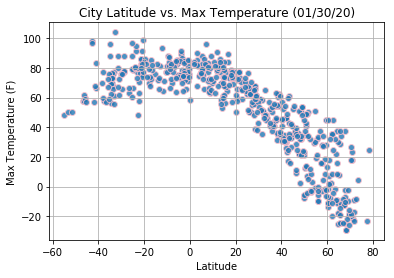

In [9]:
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
plt.scatter(lats, max_temps, edgecolor="pink", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_vs_max_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

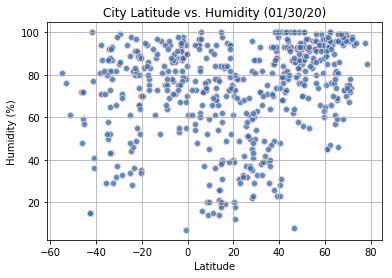

In [10]:
humidity = city_data_pd["Humidity"]
plt.scatter(lats, humidity, edgecolor="pink", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

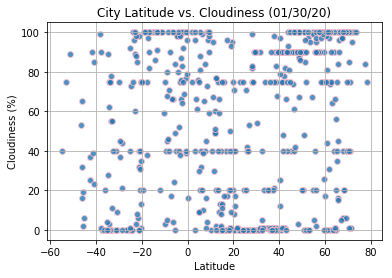

In [11]:
cloudiness = city_data_pd["Cloudiness"]
plt.scatter(lats, cloudiness, edgecolor="pink", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_vs_clound.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

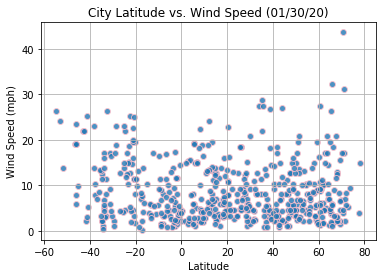

In [12]:
wind_speed = city_data_pd["Wind Speed"]
plt.scatter(lats, wind_speed, edgecolor="pink", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_vs_wind.png")

# Show plot
plt.show()